In [37]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from scipy import signal
import math

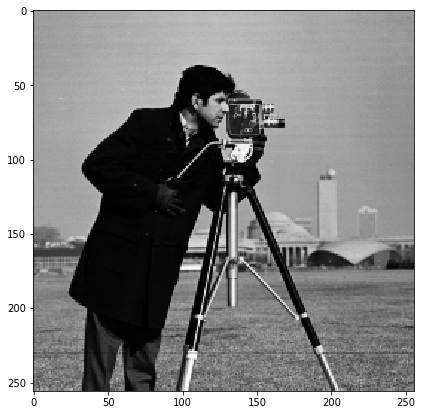

In [38]:
# Read the image and be sure it is grayscale
im_path = 'cameraman.png'
im = io.imread(im_path)
im = rgb2gray(im)

# Ensure the image is a float in the range [0-1]
im = ((im - np.min(im)) * (1/(np.max(im) - np.min(im)) *1.0)).astype('float')

# Show the image
fig1 = plt.figure(figsize = (7,7))
plt.imshow(im, cmap='gray')

In [39]:
# Create an nxn filter of the function: f(x,y) = a*sin(x) + b*cos(y)
def create_filter(n, a, b):
    
    # Make sure the filter is an odd size
    if (n%2 == 0):
        n += 1
        
    # Create a blank filter nxn
    filter_out = np.zeros((n,n))
    
    # These are the points (x,y) we want to sample our function f(x,y)
    # This also centers our sampling in the middle of the filter
    # They don't necessarily need to correspond to integer indices of the array
    x_sampling = np.linspace(-n/2, n/2, n)
    y_sampling = np.linspace(-n/2, n/2, n)
    
    # If you want integer sampling use
    x_sampling = np.linspace(-(n-1)/2, (n-1)/2, n)
    y_sampling = np.linspace(-(n-1)/2, (n-1)/2, n)
   
    # Fill in the filter
    for x in range(0, len(x_sampling)):
        for y in range(0, len(y_sampling)):
            
            # Sample the function at our precomputed sampling locations
            filter_out[x,y] = a*math.sin(x_sampling[x]) + b*math.cos(y_sampling[y])
            
    # Normalize the filter (sum to 1)
    filter_out = filter_out / np.sum(filter_out.flatten())
    
    return filter_out

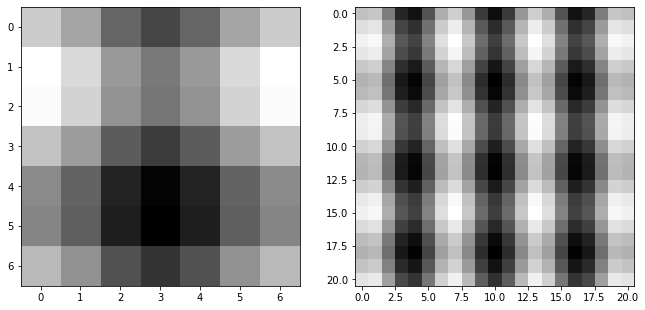

In [40]:
# Create a small and large filter
f_small = create_filter(7, 1, 1)
f_large = create_filter(21, 1, 3)

# See what the filters look like
plt.subplots(1,2,figsize=(11,11))

plt.subplot(1,2,1)
plt.imshow(f_small, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(f_large, cmap='gray')

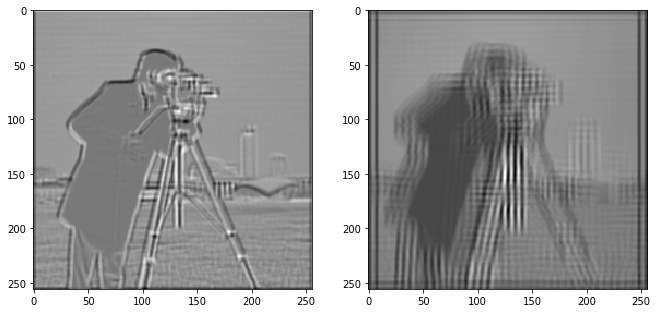

In [41]:
# Convolve our test image with the filters using built in functoin
# Don't do it this way for your project!
out_im_small = signal.convolve2d(im, f_small, boundary='fill', mode='same', fillvalue=0)
out_im_large = signal.convolve2d(im, f_large, boundary='fill', mode='same', fillvalue=0)

# Take a look at the results
plt.subplots(1,2,figsize=(11,11))

plt.subplot(1,2,1)
plt.imshow(out_im_small, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(out_im_large, cmap='gray')